In [50]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from networkx.utils import reverse_cuthill_mckee_ordering

In [51]:
def get_bandwidth(G):
    L = nx.laplacian_matrix(G, nodelist=sorted(G.nodes)) # Laplacian Matrix
    x,y = np.nonzero(L)
    print(type(x))
    print(type(y))
    print(x)
    print(y)
    # return (y-x).max()+(x-y).max()+1 # What should be?
    return (x-y).max()
    

def print_nodes_info(G):
    print("------------------------------------------")
    for n in sorted(G.nodes()):
        print('Id node {} has label {} / degree: {}'.format(G.nodes[n]['id'], n, G.degree(n)))
    print("------------------------------------------")


def plot_graph(G):
    pos = nx.spring_layout(G)
    nx.draw(G, pos)
    nx.draw_networkx_labels(G, pos, font_size=12)
    plt.show()

In [52]:
# building graph
G = nx.Graph()
G.add_edges_from([(0,1),(6,7),(1,2),(0,8),(2,3),(0,4),(0,5),(3,6),(6,4),(6,5),(1,3)])

# add ids to nodes
attrs = dict()
for i in range(9):
    attrs[i] = {'id': i}
nx.set_node_attributes(G, attrs)

print_nodes_info(G)

------------------------------------------
Id node 0 has label 0 / degree: 4
Id node 1 has label 1 / degree: 3
Id node 2 has label 2 / degree: 2
Id node 3 has label 3 / degree: 3
Id node 4 has label 4 / degree: 2
Id node 5 has label 5 / degree: 2
Id node 6 has label 6 / degree: 4
Id node 7 has label 7 / degree: 1
Id node 8 has label 8 / degree: 1
------------------------------------------


ppp
  (0, 0)	4
  (0, 1)	-1
  (0, 4)	-1
  (0, 5)	-1
  (0, 8)	-1
  (1, 0)	-1
  (1, 1)	3
  (1, 2)	-1
  (1, 3)	-1
  (2, 1)	-1
  (2, 2)	2
  (2, 3)	-1
  (3, 1)	-1
  (3, 2)	-1
  (3, 3)	3
  (3, 6)	-1
  (4, 0)	-1
  (4, 4)	2
  (4, 6)	-1
  (5, 0)	-1
  (5, 5)	2
  (5, 6)	-1
  (6, 3)	-1
  (6, 4)	-1
  (6, 5)	-1
  (6, 6)	4
  (6, 7)	-1
  (7, 6)	-1
  (7, 7)	1
  (8, 0)	-1
  (8, 8)	1
<class 'scipy.sparse.csr.csr_matrix'>
ppp1
  (0, 0)	4
  (0, 1)	-1
  (0, 4)	-1
  (0, 5)	-1
  (0, 8)	-1
ppp2
  (0, 0)	-1
  (0, 1)	3
  (0, 2)	-1
  (0, 3)	-1
ppp3
  (0, 1)	-1
  (0, 2)	2
  (0, 3)	-1
Bandwidth of G: 8


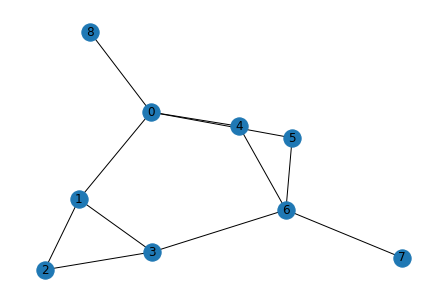

In [53]:
print('Bandwidth of G: %d' % get_bandwidth(G))
plot_graph(G)

ppp
  (0, 0)	1
  (0, 3)	-1
  (1, 1)	3
  (1, 2)	-1
  (1, 3)	-1
  (1, 4)	-1
  (2, 1)	-1
  (2, 2)	2
  (2, 4)	-1
  (3, 0)	-1
  (3, 1)	-1
  (3, 3)	4
  (3, 5)	-1
  (3, 6)	-1
  (4, 1)	-1
  (4, 2)	-1
  (4, 4)	3
  (4, 7)	-1
  (5, 3)	-1
  (5, 5)	2
  (5, 7)	-1
  (6, 3)	-1
  (6, 6)	2
  (6, 7)	-1
  (7, 4)	-1
  (7, 5)	-1
  (7, 6)	-1
  (7, 7)	4
  (7, 8)	-1
  (8, 7)	-1
  (8, 8)	1
<class 'scipy.sparse.csr.csr_matrix'>
ppp1
  (0, 0)	1
  (0, 3)	-1
ppp2
  (0, 1)	3
  (0, 2)	-1
  (0, 3)	-1
  (0, 4)	-1
ppp3
  (0, 1)	-1
  (0, 2)	2
  (0, 4)	-1
Bandwidth of G: 3


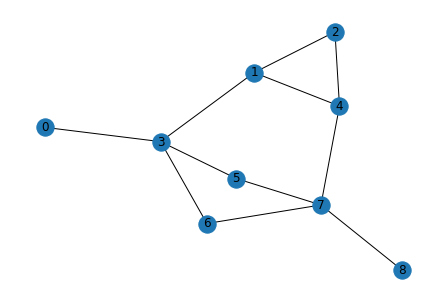

------------------------------------------
Id node 7 has label 0 / degree: 1
Id node 3 has label 1 / degree: 3
Id node 2 has label 2 / degree: 2
Id node 6 has label 3 / degree: 4
Id node 1 has label 4 / degree: 3
Id node 5 has label 5 / degree: 2
Id node 4 has label 6 / degree: 2
Id node 0 has label 7 / degree: 4
Id node 8 has label 8 / degree: 1
------------------------------------------


In [54]:
# relabel nodes using rcm
# rcm = list(reverse_cuthill_mckee_ordering(G))
# mapping = dict(zip(rcm, sorted(G.nodes)))
# G = nx.relabel_nodes(G, mapping)
# Or:
rcm = list(reverse_cuthill_mckee_ordering(G))
G = nx.adjacency_matrix(G, nodelist=rcm)
G = nx.Graph(G)
attrs2 = dict()
for i in G.nodes:
    attrs2[i] = {'id': rcm[i]}
nx.set_node_attributes(G, attrs2)

print('Bandwidth of G: %d' % get_bandwidth(G))
plot_graph(G)
print_nodes_info(G)